<a href="https://colab.research.google.com/github/GeethR/TopicClassification/blob/main/Cooper_Topic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cooper - Level 2 - Multiclass Text Classifier 

In [2]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math


In [3]:
# Importing dataset
data_df=pd.read_csv('/content/Context.csv') 
print("Shape of data=>",data_df.shape)

Shape of data=> (31386, 2)


In [6]:
data_df=data_df[['Text', 'Context/Topic']]
print("Shape of data=>",data_df.shape)
data_df.head(5)

Shape of data=> (31386, 2)


,Text,Context/Topic
0,The eternal mystique of Goldman Sachs,Politics
1,Either you don't care enough to actually tell ...,Love
2,I am such an IDIOT.,Heavy Emotion
3,While lifting weights on Friday and doing bent...,Health
4,Something's watching me,Animals


Handle missing values

In [7]:
data_df.dropna(inplace=True)
data_df.isnull().sum()

Text             0
Context/Topic    0
dtype: int64

Identify number of topics involved in the given dataset.

In [9]:
data_df=data_df.groupby('Context/Topic').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of Topics=>',len(data_df['Context/Topic'].unique()))

Number of Topics=> 11


In [10]:
data_df['Context/Topic'].unique()

array(['Politics', 'Love', 'Heavy Emotion', 'Health', 'Animals',
       'Science', 'Joke', 'Compliment', 'Religion', 'Self', 'Education'],
      dtype=object)

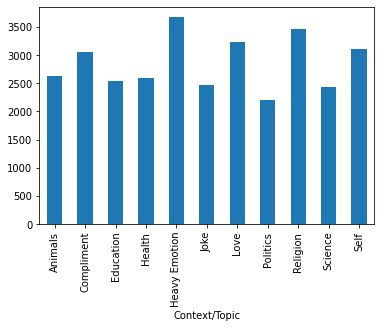

In [23]:
data_df.groupby(['Context/Topic']).size().plot.bar()

Expand Contractions 

In [11]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
data_df['Text']=data_df['Text'].apply(lambda x:expand_contractions(x))
data_df.head(5)

,Text,Context/Topic
0,The eternal mystique of Goldman Sachs,Politics
1,Either you do not care enough to actually tell...,Love
2,I am such an IDIOT.,Heavy Emotion
3,While lifting weights on Friday and doing bent...,Health
4,Something is watching me,Animals


Cleansing the Text 

In [14]:
data_df['cleaned_text']=data_df['Text'].apply(lambda x: x.lower())  #Lower case
data_df['cleaned_text']=data_df['cleaned_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))  #Remove Punctuations
data_df['cleaned_text']=data_df['cleaned_text'].apply(lambda x: re.sub(' +',' ',x)) # Removing extra spaces
data_df.head(5)

,Text,Context/Topic,cleaned_text
0,The eternal mystique of Goldman Sachs,Politics,the eternal mystique of goldman sachs
1,Either you do not care enough to actually tell...,Love,either you do not care enough to actually tell...
2,I am such an IDIOT.,Heavy Emotion,i am such an idiot
3,While lifting weights on Friday and doing bent...,Health,while lifting weights on friday and doing bent...
4,Something is watching me,Animals,something is watching me


Preparing Text for EDA

In [15]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
data_df['lemmatized']=data_df['cleaned_text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
data_df.head(5)

,Text,Context/Topic,cleaned_text,lemmatized
0,The eternal mystique of Goldman Sachs,Politics,the eternal mystique of goldman sachs,eternal mystique goldman sachs
1,Either you do not care enough to actually tell...,Love,either you do not care enough to actually tell...,care actually tell u feel dumbass thinking wor...
2,I am such an IDIOT.,Heavy Emotion,i am such an idiot,idiot
3,While lifting weights on Friday and doing bent...,Health,while lifting weights on friday and doing bent...,lift weight friday bent row feel sharp pain lo...
4,Something is watching me,Animals,something is watching me,watch


In [17]:
df_grouped=data_df[['Context/Topic','lemmatized']].groupby(by='Context/Topic').agg(lambda x:' '.join(x))
df_grouped

,lemmatized
Context/Topic,
Animals,watch plantação de palma na indonésia é uma du...
Compliment,yea get to remember xd haha prove nice ☺ ️ kno...
Education,snowflake math teacher asshole 4 useful necess...
Health,lift weight friday bent row feel sharp pain lo...
Heavy Emotion,idiot mom burden family hate eventually friend...
Joke,pinnacle american financial journalism right s...
Love,care actually tell u feel dumbass thinking wor...
Politics,eternal mystique goldman sachs exnavy seal con...
Religion,prince tyre antichrist religion cause bad good...


Create Term-Document Matrix

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,0000000000001,000000000001,0000000001,00000001,000001,0017,002001,002002,002003,...,極寒の日のカピバラ露天風呂,美容ゲルクリーム,翔尘,肩甲骨でバストアップ,骨盤ダイエット,바카라사이트,안전바카라,조커바카라,카지노사이트,코모도바카라
Context/Topic,,,,,,,,,,,,,,,,,,,,,
Animals,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,1,1
Compliment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Education,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Health,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Heavy Emotion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Joke,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Love,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Politics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Religion,1,1,2,2,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


Word Cloud

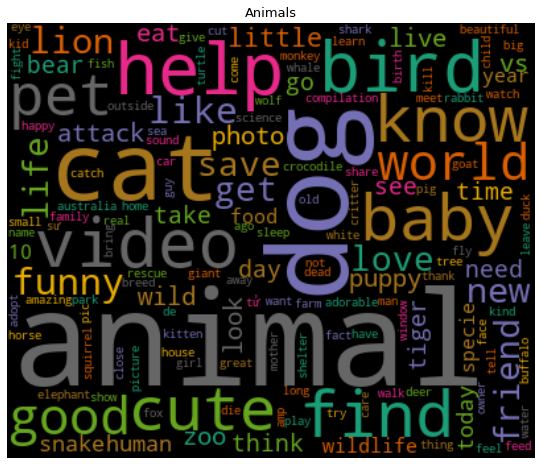

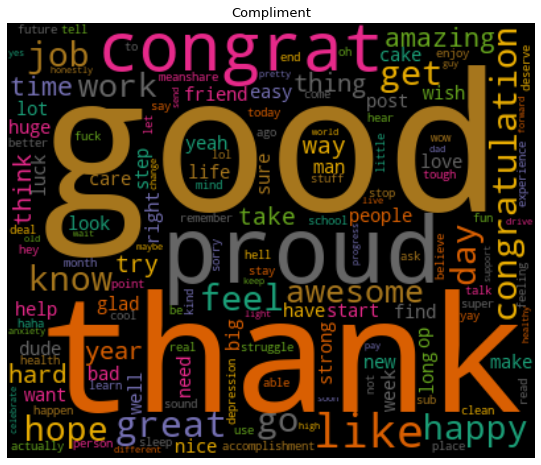

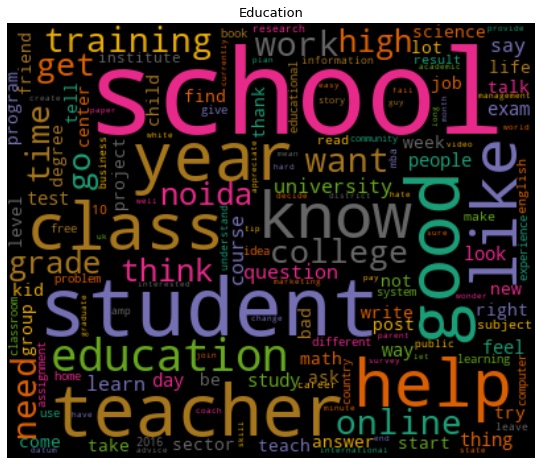

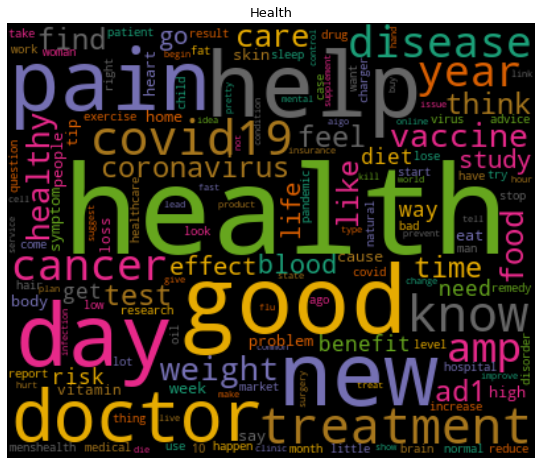

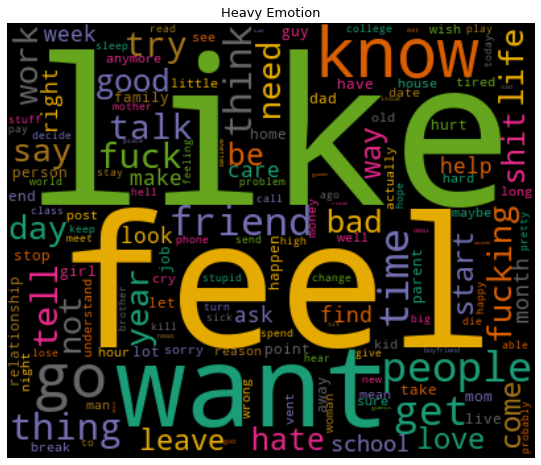

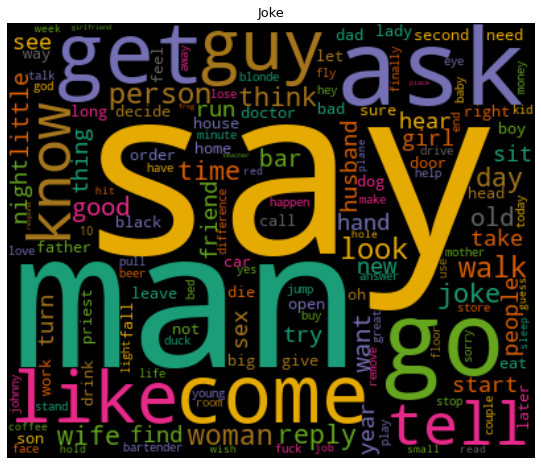

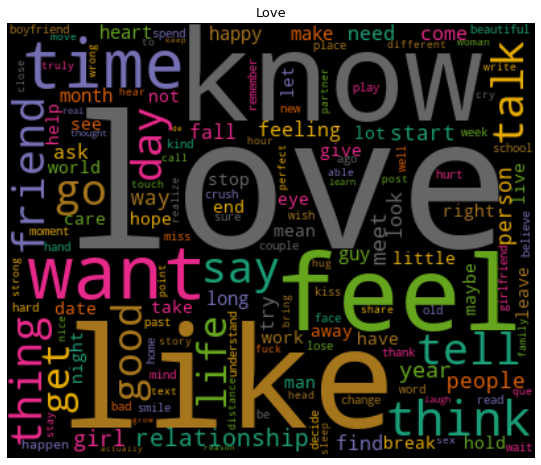

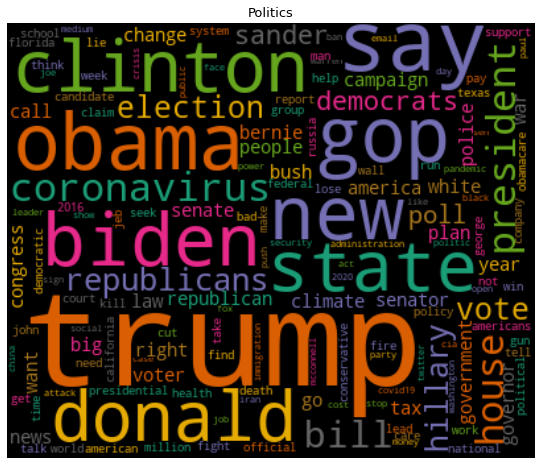

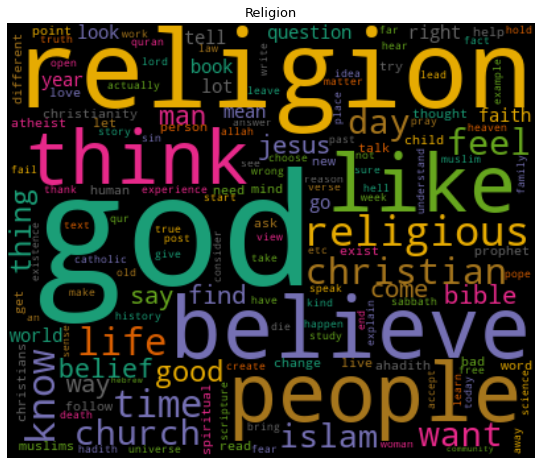

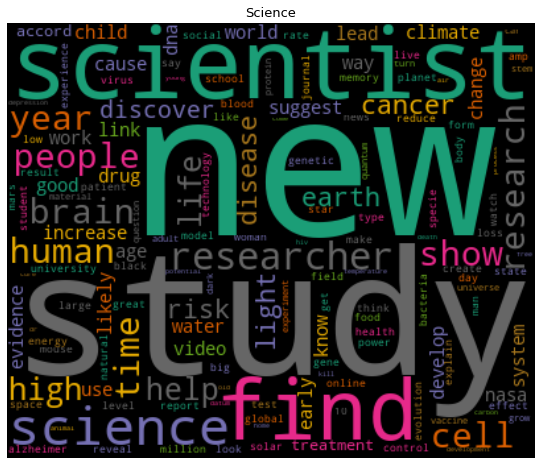

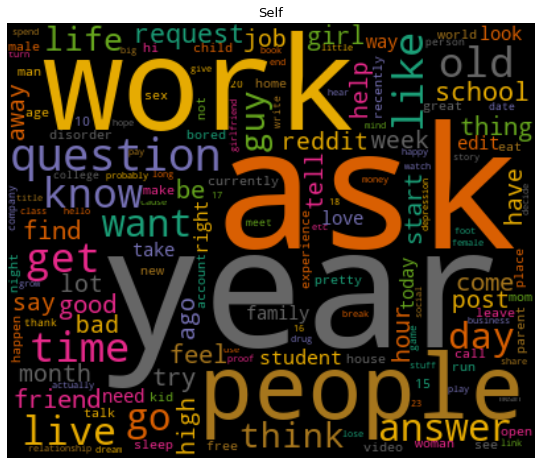

In [22]:
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

BERT Tokenizer

In [25]:
pip install transformers

     |████████████████████████████████| 3.8 MB 7.3 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 6.5 MB 45.1 MB/s 
     |████████████████████████████████| 895 kB 21.4 MB/s 
     |████████████████████████████████| 596 kB 37.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [26]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

example_text = 'I will watch Memento tonight'
bert_input = tokenizer(example_text,padding='max_length', max_length = 10, 
                       truncation=True, return_tensors="pt")


print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

tensor([[  101,   146,  1209,  2824,  2508, 26173,  3568,   102,     0,     0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])
